In [84]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import torch
import pandas as pd
from torch.utils.data import Dataset
import clip
import random

In [19]:
def plot_images(n, images, figsize=(12, 8), cmap='gray'):
    cols = math.ceil(math.sqrt(n))
    rows = int(math.sqrt(n))
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else [axes]
    
    for idx, ax in enumerate(axes):
        if idx < n:
            ax.imshow(images[idx], cmap=cmap)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
def find_all_files(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file_path)
    return file_list


image_paths = find_all_files("dataset")

In [55]:
class MyDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform
        
        
    def __getitem__(self, index):
        key = self.images[index]
        image = Image.open(key).convert("RGB")
        if self.transform is not None:
            image = self.transform(image)
        return key, image
        
    def __len__(self):
        return len(self.images)
        

In [75]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

dataset = MyDataset(image_paths, transform=preprocess)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

embedding = {}
with torch.no_grad():
    for keys, images in dataloader:
        latents = model.encode_image(images.to(device))
        for key, latent in zip(keys, latents):
            embedding[key] = latent.detach().cpu().numpy().flatten()
            print(key, latent.shape)


torch.Size([32, 512])
dataset\0000.png torch.Size([512])
dataset\0001.png torch.Size([512])
dataset\0002.png torch.Size([512])
dataset\0003.png torch.Size([512])
dataset\0004.png torch.Size([512])
dataset\0005.png torch.Size([512])
dataset\0006.png torch.Size([512])
dataset\0007.png torch.Size([512])
dataset\0008.png torch.Size([512])
dataset\0009.png torch.Size([512])
dataset\0010.png torch.Size([512])
dataset\0011.png torch.Size([512])
dataset\0012.png torch.Size([512])
dataset\0013.png torch.Size([512])
dataset\0014.png torch.Size([512])
dataset\0015.png torch.Size([512])
dataset\0016.png torch.Size([512])
dataset\0017.png torch.Size([512])
dataset\0018.png torch.Size([512])
dataset\0019.png torch.Size([512])
dataset\0020.png torch.Size([512])
dataset\0021.png torch.Size([512])
dataset\0022.png torch.Size([512])
dataset\0023.png torch.Size([512])
dataset\0024.png torch.Size([512])
dataset\0025.png torch.Size([512])
dataset\0026.png torch.Size([512])
dataset\0027.png torch.Size([512]

In [78]:
mse = {}
for key_1, latent_1 in embedding.items():
    current_mse = {}
    print(key_1)
    for key_2, latent_2 in embedding.items():
        if key_1 != key_2:
            current_mse[key_2] = np.square(latent_1-latent_2).mean()
    mse[key_1] = current_mse

dataset\0000.png
dataset\0001.png
dataset\0002.png
dataset\0003.png
dataset\0004.png
dataset\0005.png
dataset\0006.png
dataset\0007.png
dataset\0008.png
dataset\0009.png
dataset\0010.png
dataset\0011.png
dataset\0012.png
dataset\0013.png
dataset\0014.png
dataset\0015.png
dataset\0016.png
dataset\0017.png
dataset\0018.png
dataset\0019.png
dataset\0020.png
dataset\0021.png
dataset\0022.png
dataset\0023.png
dataset\0024.png
dataset\0025.png
dataset\0026.png
dataset\0027.png
dataset\0028.png
dataset\0029.png
dataset\0030.png
dataset\0031.png
dataset\0032.png
dataset\0033.png
dataset\0034.png
dataset\0035.png
dataset\0036.png
dataset\0037.png
dataset\0038.png
dataset\0039.png
dataset\0040.png
dataset\0041.png
dataset\0042.png
dataset\0043.png
dataset\0044.png
dataset\0045.png
dataset\0046.png
dataset\0047.png
dataset\0048.png
dataset\0049.png
dataset\0050.png
dataset\0051.png
dataset\0052.png
dataset\0053.png
dataset\0054.png
dataset\0055.png
dataset\0056.png
dataset\0057.png
dataset\0058.p

In [87]:
top_5_mse = {}
for key, current_mse in mse.items():
    top_5 = {k: v for k, v in sorted(current_mse.items(), key=lambda kv: (kv[1], kv[0]))[:5]}
    print(key)
    top_5_mse[key] = top_5

dataset\0000.png
dataset\0001.png
dataset\0002.png
dataset\0003.png
dataset\0004.png
dataset\0005.png
dataset\0006.png
dataset\0007.png
dataset\0008.png
dataset\0009.png
dataset\0010.png
dataset\0011.png
dataset\0012.png
dataset\0013.png
dataset\0014.png
dataset\0015.png
dataset\0016.png
dataset\0017.png
dataset\0018.png
dataset\0019.png
dataset\0020.png
dataset\0021.png
dataset\0022.png
dataset\0023.png
dataset\0024.png
dataset\0025.png
dataset\0026.png
dataset\0027.png
dataset\0028.png
dataset\0029.png
dataset\0030.png
dataset\0031.png
dataset\0032.png
dataset\0033.png
dataset\0034.png
dataset\0035.png
dataset\0036.png
dataset\0037.png
dataset\0038.png
dataset\0039.png
dataset\0040.png
dataset\0041.png
dataset\0042.png
dataset\0043.png
dataset\0044.png
dataset\0045.png
dataset\0046.png
dataset\0047.png
dataset\0048.png
dataset\0049.png
dataset\0050.png
dataset\0051.png
dataset\0052.png
dataset\0053.png
dataset\0054.png
dataset\0055.png
dataset\0056.png
dataset\0057.png
dataset\0058.p

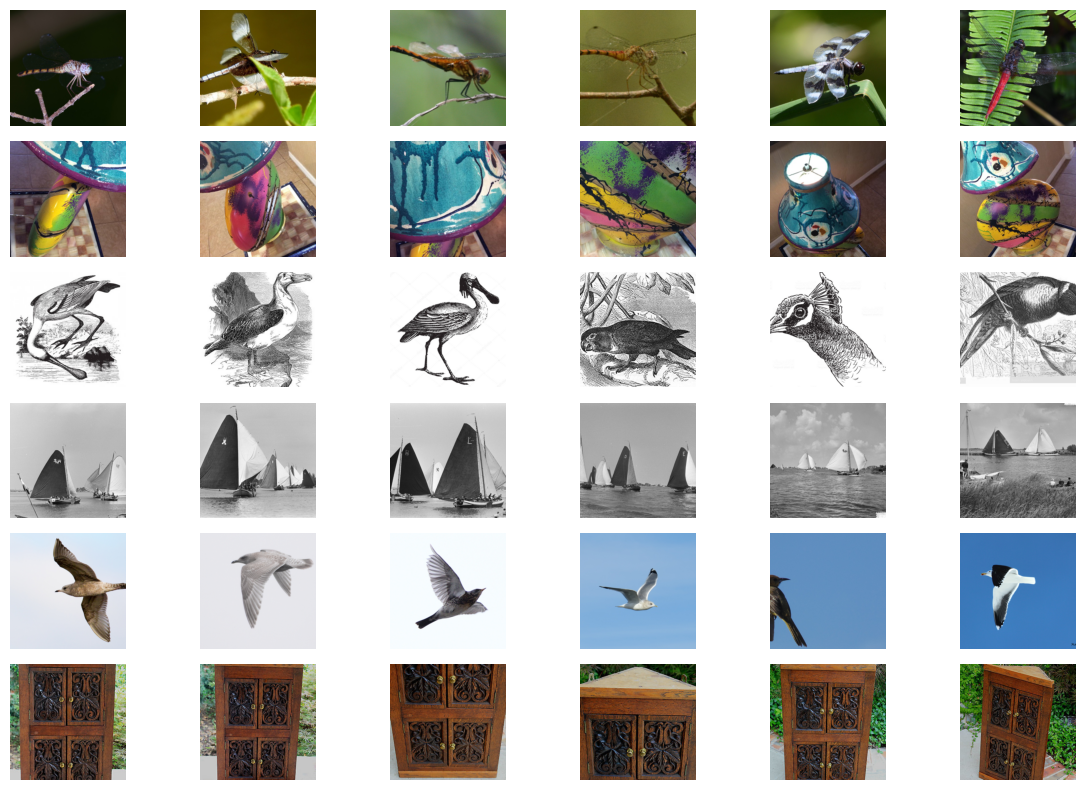

In [113]:
images = []
for key in random.sample(list(top_5_mse.keys()), 6):
    images.append(key)
    images += list(top_5_mse[key].keys())
plot_images(36, [np.array(Image.open(path).convert("RGB")) for path in images])

In [106]:
ans = {"filename": [],
        "ranking": []}
for key, values in top_5_mse.items():
    ans["filename"].append(os.path.basename(key))
    ans["ranking"].append(" ".join(map(os.path.basename, values.keys())))
ans = pd.DataFrame.from_dict(ans)
ans.to_csv('submission.csv', index=False)
ans

,filename,ranking
0,0000.png,5924.png 8222.png 2023.png 1381.png 2750.png
1,0001.png,5029.png 5193.png 5721.png 3598.png 3986.png
2,0002.png,3977.png 2448.png 1858.png 2193.png 7688.png
3,0003.png,5277.png 1393.png 4053.png 4541.png 7448.png
4,0004.png,0258.png 6371.png 7238.png 2961.png 2462.png
...,...,...
9600,9600.png,6001.png 3704.png 6353.png 3809.png 1903.png
9601,9601.png,2285.png 7489.png 8581.png 0789.png 2910.png
9602,9602.png,7691.png 1661.png 4789.png 3247.png 5715.png
9603,9603.png,0893.png 8022.png 5323.png 7483.png 2079.png
